In [1]:
%matplotlib inline
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data/labeledTrainData.tsv', sep='\t')
X = data.review.as_matrix()
y = data.sentiment.as_matrix()
del data['id']
data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=4000, random_state=0, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_bag = vectorizer.fit_transform(X_train)
X_test_bag = vectorizer.transform(X_test)

In [10]:
most_frequent = argsort(sum(X_train_bag.A, axis=0))[::-1][:1500]
X_train_f = X_train_bag[:, most_frequent]
X_test_f = X_test_bag[:, most_frequent]

Постройте RF, Logistic Regression, SVM, KNN

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [13]:
%%time
classifiers = [RandomForestClassifier(random_state=42), 
               LogisticRegression(random_state=42), 
#                SVC(random_state=42),
               KNeighborsClassifier()]
for clf in classifiers:
    clf.fit(X_train_f, y_train)
    print clf.score(X_test_f, y_test)

0.76275
0.84975
0.60525
CPU times: user 11.5 s, sys: 1.34 s, total: 12.9 s
Wall time: 13.3 s


Постройте *precision-recall* и *roc* кривые обученных выше классификаторов (каждый тип кривой на отдельном графике), а также вычислите площадь под ними. Для этого удобно воспользоваться функциями [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html), [roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) и [auc](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc). Не забудьте, что в данном случае необходимо использовать метод *predict_proba* для получения оценки принадлежности к первому классу.

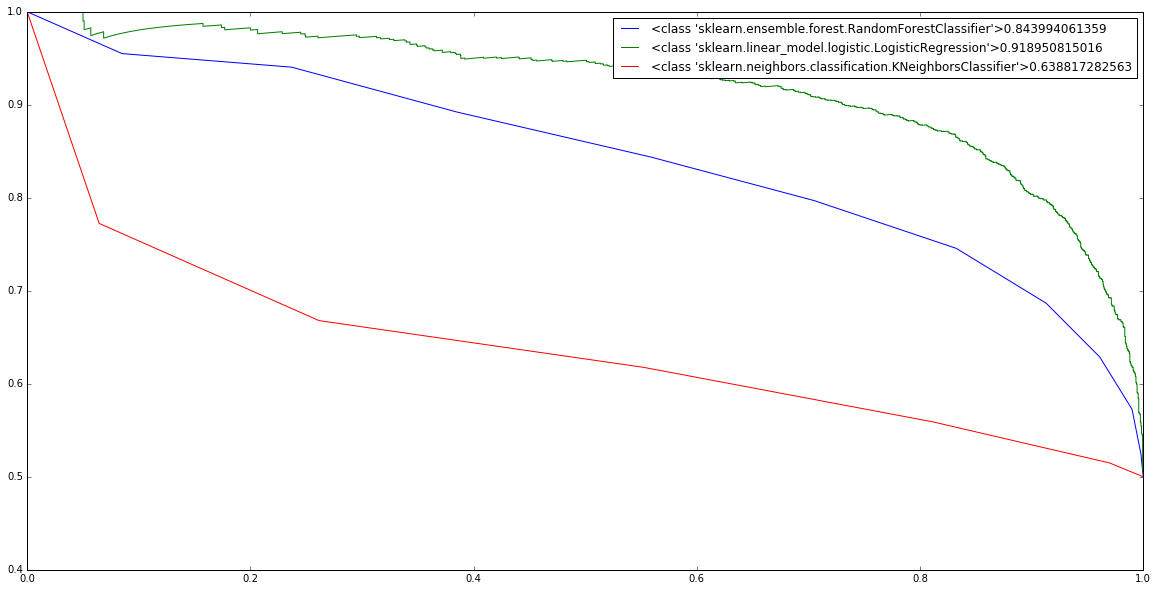

In [22]:
from sklearn.metrics import auc

figure(figsize=(20, 10))
from sklearn.metrics import precision_recall_curve
for clf in classifiers:
    precision, recall, thresh = \
        precision_recall_curve(y_test, clf.predict_proba(X_test_f)[:,1])
    plot(recall, precision, 
         label=str(type(clf)) + str(auc(recall, precision)))
    
legend()

Разбейте данные на 5 фолдов и подберите параметры у лучшего из алгоритмов. Улучшились ли AUC ROC, AUC PRC?

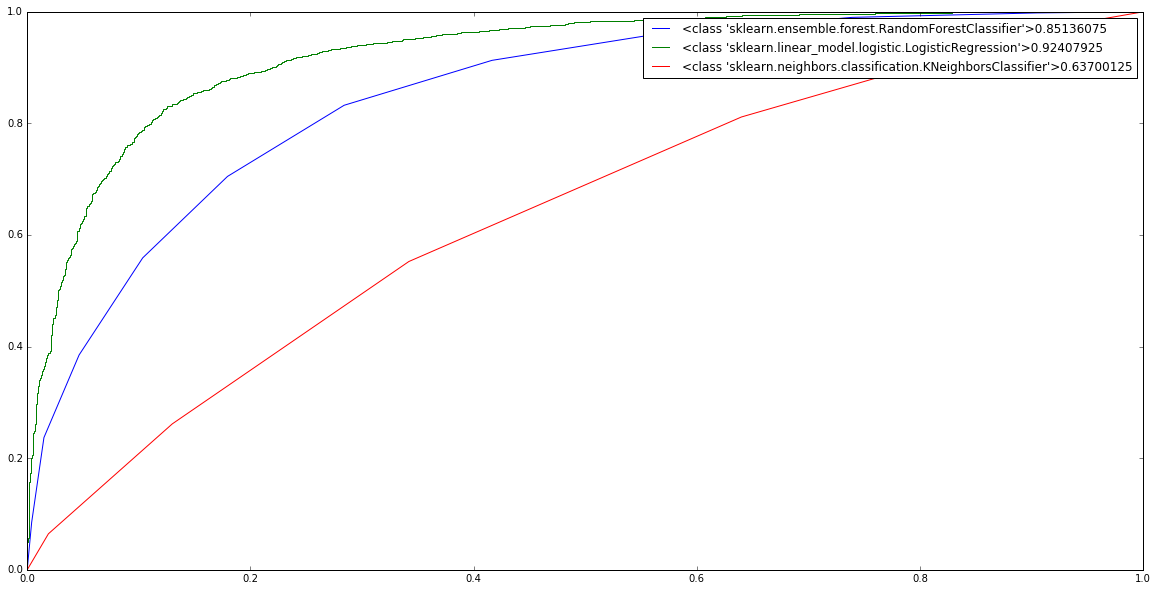

In [24]:
figure(figsize=(20, 10))
from sklearn.metrics import roc_curve
for clf in classifiers:
    fpr, trp, thresh = \
        roc_curve(y_test, clf.predict_proba(X_test_f)[:,1])
    plot(fpr, trp, label=str(type(clf)) + str(auc(fpr, trp)))
    
legend()

In [36]:
from sklearn.metrics import f1_score
for clf in classifiers:
    print f1_score(y_test.astype(float), 
                   clf.predict(X_test_f))


0.748209074025
0.85112707456
0.583267352864
